# Datalhes da experiencia do pendulo.

| Massa da esfera | Diametro da esfera | Percurso da esfera através de laser | Constante de elasticidade |
| :- | -: | :-: | :-: |
| 2kG +/- 75G | 81mm +/- 0.5mm | ~81mm | 200GPa |


Para mais informação accesar o link abaixo.







## Importar bibliotecas necessárias

In [114]:
#%matplotlib inline # Para visualização dos plots abaixo onde codigo que gera esse plot foi escrito.
import pandas as pd # Para exploração dos dados de forma rápida.
import numpy as np # Para cálculos algebricos (vectores & matrizes).
import matplotlib.pyplot as plt # Para visualização dos dados.
import matplotlib.colors as colors # cores
import warnings
warnings.filterwarnings("ignore")
np.seterr(divide='ignore', invalid='ignore')
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker


####  1. Carregamento e exploração dos dados.

In [68]:
# Criar uma função para fazer o import dos dados.
def read_data(filename):
    df = pd.read_excel(filename, skiprows = 1)
    return df

In [69]:
file = 'Dados/Pendulum_results__19-7-2022  15_15_17.xlsx'

# Ler meus dados
df = read_data(file)

In [70]:
df.head() # Visualizar somente as primeiras 5 linhas

,Sample Number,Period [s],g [m/s^2],Velocity [cm/s],Temperature [ºC]
0,1,3.193712,9.761427,32.418556,21.84
1,2,3.193704,9.761478,32.383606,21.89
2,3,3.193729,9.761324,32.354523,21.89
3,4,3.193784,9.760985,32.338100,21.91
4,5,3.193745,9.761226,32.316158,21.94


In [71]:
df.dtypes # tipo de dados

Sample Number         int64
Period [s]          float64
g [m/s^2]           float64
Velocity [cm/s]     float64
Temperature [ºC]    float64
dtype: object

In [72]:
# accesar aos valores de cada coluna
# 3 possiveis soluções
df['Sample Number'].values
df.iloc[:,0].values
df.loc[0:, 'Sample Number'].values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [73]:
# Converter cm/s -> m/s
#df['Velocity [cm/s]'] = df['Velocity [cm/s]'] * 0.01

In [74]:
#df.rename({'Velocity [cm/s]':'Velocity [m/s]'},axis = 1, inplace = True)

In [75]:
# Erros das medições
error_period = 0.005
error_velocity = 0.1

### 2. Visualização.

Velocidade e periodo do pendulo por números de amostras adquiridas.

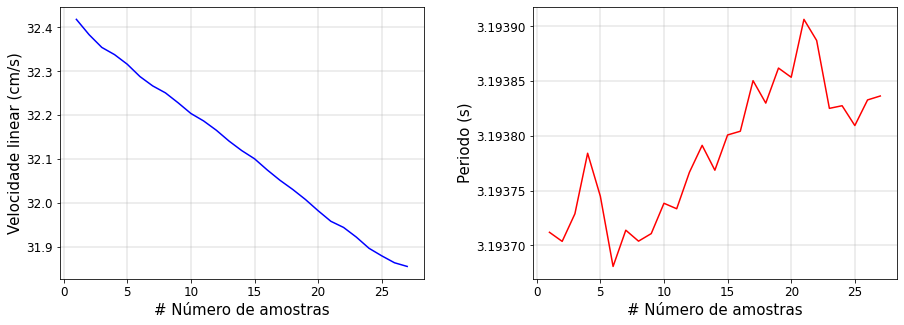

In [120]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharex=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

ax1.plot(df.iloc[:,0].values, df.iloc[:,3].values, color='blue', label='Velocidadde linear do pendulo')
#ax1.errorbar(df.iloc[:,0].values, df.iloc[:,3].values, yerr=error_velocity,
   #          fmt='o', capsize=5, capthick=1, ecolor='black',
    #        label='Velocidade linear do pendulo')

ax1.set_xlabel("# Número de amostras", fontsize=15)
ax1.set_ylabel("Velocidade linear (cm/s)", fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=12)



ax1.grid(linewidth=0.45)

#ax1.plot(df.iloc[:,0].values, df.iloc[:,3].values, color='tab:blue', label='Velocity(km/h)')
ax2.yaxis.set_major_formatter(FormatStrFormatter('%0.5f'))
ax2.plot(df.iloc[:,0].values, df.iloc[:,1].to_numpy(), color='red',
            label='Periodo do pendulo')

ax2.set_xlabel("# Número de amostras", fontsize=15)
ax2.set_ylabel("Periodo (s)", fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=12)


ax2.grid(linewidth=0.45)


plt.savefig('Figuras/vel_amostra' + '.pdf', format='pdf', dpi=300, bbox_inches='tight') 

Histograma das medidas de periodo

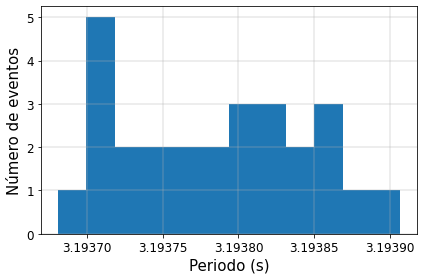

In [122]:
# the histogram of the data
periodo  = df.iloc[:,1].values

fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(FormatStrFormatter('%0.5f'))
n, bins, patches = plt.hist(periodo, bins=12)
plt.grid(linewidth=0.45)

plt.xlabel('Periodo (s)', fontsize=15)
plt.ylabel('Número de eventos', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
#plt.show()

plt.savefig('./Figuras/periodo_histograma' + '.pdf',bbox_inches='tight',format='pdf', dpi=150) 